# Mínimos cuadrados utilizando numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Se define la función a la cual se le desean encontrar sus coeficientes, especificando por aparte sus coeficientes:

In [2]:
coef = [0.4, 0.3, -2, 4]
f = lambda x, c : c[0]*x**3 + c[1]*x**2 + c[2]*x + c[3]


Muestrearemos de dicha función $n$ puntos y los contaminaremos con un ruido gausiano. Así pues, se obtienen las lecturas $(x_i, y_i)$ para $i = 1, 2, \ldots, n$:

In [3]:
n = 21
x = np.linspace(-5, 5, n)
y = f(x, coef) + 3*np.random.randn(n)

Se grafica la función $f(x)$ junto con los puntos muestreados:

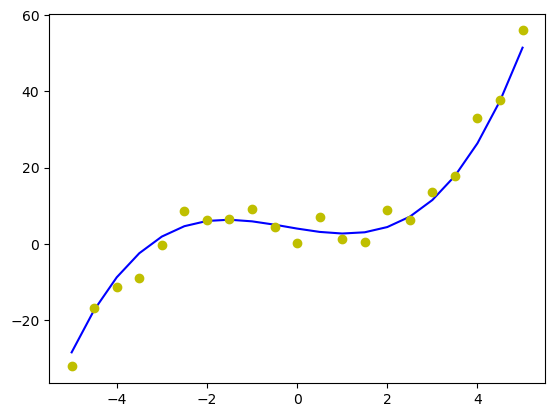

In [4]:
plt.figure()
plt.plot(x,f(x, coef),'b-',  x, y, 'yo')
plt.show()

Se crea la matriz de van der Monde asociada a la identificación de los coeficientes del polinomio:

In [5]:
A = np.c_[x**3, x**2, x, np.ones(n)]
A

array([[-125.   ,   25.   ,   -5.   ,    1.   ],
       [ -91.125,   20.25 ,   -4.5  ,    1.   ],
       [ -64.   ,   16.   ,   -4.   ,    1.   ],
       [ -42.875,   12.25 ,   -3.5  ,    1.   ],
       [ -27.   ,    9.   ,   -3.   ,    1.   ],
       [ -15.625,    6.25 ,   -2.5  ,    1.   ],
       [  -8.   ,    4.   ,   -2.   ,    1.   ],
       [  -3.375,    2.25 ,   -1.5  ,    1.   ],
       [  -1.   ,    1.   ,   -1.   ,    1.   ],
       [  -0.125,    0.25 ,   -0.5  ,    1.   ],
       [   0.   ,    0.   ,    0.   ,    1.   ],
       [   0.125,    0.25 ,    0.5  ,    1.   ],
       [   1.   ,    1.   ,    1.   ,    1.   ],
       [   3.375,    2.25 ,    1.5  ,    1.   ],
       [   8.   ,    4.   ,    2.   ,    1.   ],
       [  15.625,    6.25 ,    2.5  ,    1.   ],
       [  27.   ,    9.   ,    3.   ,    1.   ],
       [  42.875,   12.25 ,    3.5  ,    1.   ],
       [  64.   ,   16.   ,    4.   ,    1.   ],
       [  91.125,   20.25 ,    4.5  ,    1.   ],
       [ 125.   ,   

Y por mínimos cuadrados se encuentran los coeficientes:

In [6]:
coef_est, _, _, _ = np.linalg.lstsq(A, y, rcond=None)
coef_est

array([ 0.42491513,  0.30212402, -1.88254993,  4.24903432])

Comparemos esos coeficientes con los originales:

In [7]:
coef

[0.4, 0.3, -2, 4]

Se grafican ambos polinomios: uno con los coeficientes originales y otro con los estimados:

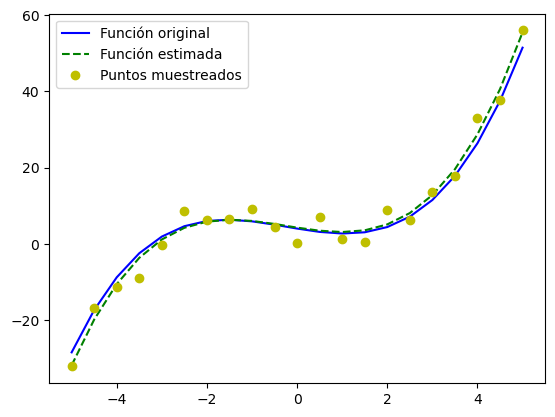

In [8]:
plt.figure()
plt.plot(x, f(x, coef),     'b-',  label='Función original')
plt.plot(x, f(x, coef_est), 'g--', label='Función estimada')
plt.plot(x, y,              'yo',  label='Puntos muestreados')
plt.legend()
plt.show()